# Carbon Tax Sentiment Classifier
By: Aidan Wallace

Objective: Create Twitter Sentiment classifier to predict polarity of new twitter data related to Carbon Tax

Research Question: How do people feel about the Carbon Tax

Creating a sentiment classifier involves 4 steps:

1. Dataset exploration, visualization 
2. Dataset Cleaning, Text Pre-Processing
3. Model Building
4. Model Evaluation, Results



In [1]:
#Import Dataset, libraries, packages, and begin intial data exploration


#IMPORT LIBRAIRES
import re
import pandas as pd
import numpy as np
import wordcloud as wc
import matplotlib.pyplot as plt
import seaborn as sns
import string 
import nltk 
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#READ FILES
data = pd.read_csv("consolidate.csv")

nltk.download('stopwords')

#Check first 5 rows
data.head()

#from this we can see there are five attributes/columns in the dataset. 
#Id, Timestamp, Tweet, Location, Polarity, so the dataset imported correctly. 

[nltk_data] Downloading package stopwords to C:\Users\Aidan
[nltk_data]     Wallace\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Id,Timestamp,Tweet,Location,Polarity
0,1.15E+18,2019-07-08 18:25,@Chris_Hall_77 @CrazyLikeMoose @AndrewScheer I...,Canada,1
1,1.15E+18,2019-07-08 18:26,@AOC Raising gas to $240 per gallon would work...,"Manhattan, NY",0
2,1.15E+18,2019-07-08 18:26,@cathmckenna Climate Barbi I know you do much ...,NaN,-1
3,1.15E+18,2019-07-08 18:27,"@cathmckenna Lol,\nHeard the news today?\nThat...",Canada,-1
4,1.15E+18,2019-07-08 18:28,To claim that Quebec is joining the fight agai...,"An Armchair, Being Holier Than Thou (Allegedly)",-1


# Data Exploration and Inital Visualization

In this step I will get a grasp on what the datset looks like and try to identify any intial problems that I will have to deal with when cleaning the data, this involves: 

1. checking the dataset to make sure it loaded correctly, 
2. checking what the tweets look like for positive, negative, and neutral tweets toidnetify trends, 
3. check the shape of the dataset, 
4. check the percentage of tweets that are postiive, negative, and neutral, 
5. Plot a histogram of tweet word length to check for outliers

In [2]:
#DATA EXPLORATION, VISUALIZATION

#look at first 10 negative tweets, positive tweets, neutral tweets

data[data['Polarity'] == -1].head(10)

,Id,Timestamp,Tweet,Location,Polarity
2,1.15E+18,2019-07-08 18:26,@cathmckenna Climate Barbi I know you do much ...,NaN,-1
3,1.15E+18,2019-07-08 18:27,"@cathmckenna Lol,\nHeard the news today?\nThat...",Canada,-1
4,1.15E+18,2019-07-08 18:28,To claim that Quebec is joining the fight agai...,"An Armchair, Being Holier Than Thou (Allegedly)",-1
7,1.15E+18,2019-07-08 18:28,Trudeau is going to impose a secret fuel tax a...,"Ottawa, Ontario",-1
13,1.15E+18,2019-07-08 18:30,@CTVNews Trudeau's Carbon Tax increased Sask. ...,NaN,-1
14,1.15E+18,2019-07-08 18:31,@Lots_Of_Fun_69 @OtagoGrad Look at this @robni...,Toronto,-1
15,1.15E+18,2019-07-08 18:31,BREAKING: Quebec joins the fight against the T...,NaN,-1
17,1.15E+18,2019-07-08 18:33,@AndrewScheer The problem is not carbon tax. T...,"Toronto, Ontario",-1
18,1.15E+18,2019-07-08 18:34,"@CJMENews ...and with 'scrap the carbon tax', ...",Parts Unknown,-1
19,1.15E+18,2019-07-08 18:34,"Well looky here...In a shocking turn around, Q...",NaN,-1


In [3]:
data[data['Polarity'] == 1].head(10)

,Id,Timestamp,Tweet,Location,Polarity
0,1.15E+18,2019-07-08 18:25,@Chris_Hall_77 @CrazyLikeMoose @AndrewScheer I...,Canada,1
38,1.15E+18,2019-07-08 18:47,@bzank17 @CTaylor1911 (2) Most tax increases w...,"Kansas, USA",1
45,1.15E+18,2019-07-08 18:55,"@AndrewScheer Good eye Mr. Scheer, it's anothe...",NaN,1
81,1.15E+18,2019-07-08 19:22,Great to see another province opposing the fed...,Regina,1
83,1.15E+18,2019-07-08 19:23,@cobet1707 @economeager @AdamPosen I'd posit t...,"Baltimore, MD",1
88,1.15E+18,2019-07-08 19:26,"This is pretty huge, two pro carbon pricing pr...",NaN,1
89,1.15E+18,2019-07-08 19:27,@leftynut @blumenschau @TracyJo03700745 @Rache...,"Culp, Alberta, Canada",1
100,1.15E+18,2019-07-08 19:38,"@Lots_Of_Fun_69 @jjgpden Good, lets see who ar...",lower mainland bc,1
101,1.15E+18,2019-07-08 19:38,@bmagel_ I just wanna know who supports the ca...,"St. Catharines, Ontario",1
102,1.15E+18,2019-07-08 19:38,It's high time to create a World Carbon Bank h...,Vancouver,1


In [4]:
data[data['Polarity'] == 0].head(10)

,Id,Timestamp,Tweet,Location,Polarity
1,1.15E+18,2019-07-08 18:26,@AOC Raising gas to $240 per gallon would work...,"Manhattan, NY",0
5,1.15E+18,2019-07-08 18:28,To be clear - Quebec is only registered as an ...,"An Armchair, Being Holier Than Thou (Allegedly)",0
6,1.15E+18,2019-07-08 18:28,"P.E.I., Quebec intervene in Saskatchewan's leg...",Ottawa,0
8,1.15E+18,2019-07-08 18:28,The carbon tax. \n\nIt's caused the cost of bu...,"Terahnah, ON",0
9,1.15E+18,2019-07-08 18:28,@SaskParty Why is everyone complaining about t...,NaN,0
10,1.15E+18,2019-07-08 18:29,Quebec helping Saskatchewan out on the carbon ...,"Alberta, Canada",0
11,1.15E+18,2019-07-08 18:30,There are now seven provinces who have registe...,"Regina, SK Canada",0
12,1.15E+18,2019-07-08 18:30,There are now seven provinces who have registe...,"Saskatoon, SK",0
16,1.15E+18,2019-07-08 18:32,@jonathanb65 @EvanLSolomon The provincial gove...,"Trent Hills, Ontario",0
20,1.15E+18,2019-07-08 18:35,The alliance continues to build #nocarbontax\n...,"British Columbia, Canada",0


In [5]:
#Look at the shape of the dataset

data.shape

#we can confirm there are 2383 tweets with 5 attributes

(2383, 5)

In [6]:
#Shows the Polarity distribution of the tweets, we see it is moderately balanced

data["Polarity"].value_counts()

'''
Percentage of tweets that are:
    Negative: 46%
    Positive: 27%
    Neutral: 27%
'''

'\nPercentage of tweets that are:\n    Negative: 46%\n    Positive: 27%\n    Neutral: 27%\n'

<function matplotlib.pyplot.show(*args, **kw)>

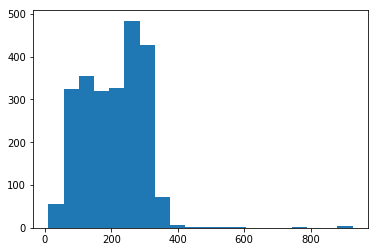

In [7]:
# Visualize the Distribution of length of tweets in terms of words

length_data = data['Tweet'].str.len()
plt.hist(length_data, bins=20, label="Tweets")
plt.legend
plt.show

# Data Cleaning 

In this step, I will begin the data cleaning process. In keeping with the literature review, the data cleaning will involve: 

Creating a user defined function to loop through each tweet that will:

1. Remove Twitter Handles
2. Remove punctuation, numbers, and special characters, 
3. Remove shortwords (length 2)


In [8]:
#DATA CLEANING

'''
By looking at the first 10 rows we can see data cleaning areas immediately. 
Removing twitter handles, punctuation, and small words.
Once the initial cleaning is done we will be ready to tokenize the tweets 
(split the words of each tweet up.)
'''

#A) REMOVE TWITTER HANDLES

'''
now we define a user-generated function with two arguments, the first is the string input, 
the second is the pattern we are looking to remove: The same string is retunred without the pattern.
'''

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    
    for i in r:
        
        input_txt = re.sub(i, '', input_txt)
    
    return input_txt

'''
Now we will make a column labelled "clean_tweet" that will contain our cleaned, processed tweets. 
notice in this next part how I pass "@[W]*" as the argument for pattern, which is a signal that I
want to remove everything startign with the '@' sign.
'''

#remove twitter handles (@user)

data['clean_tweet'] = np.vectorize(remove_pattern)(data['Tweet'], "@[\w]*")

'''
view differenece between tweet and clean_tweet
'''
data.head()

,Id,Timestamp,Tweet,Location,Polarity,clean_tweet
0,1.15E+18,2019-07-08 18:25,@Chris_Hall_77 @CrazyLikeMoose @AndrewScheer I...,Canada,1,It was happening since 4.5 Billion years (i...
1,1.15E+18,2019-07-08 18:26,@AOC Raising gas to $240 per gallon would work...,"Manhattan, NY",0,Raising gas to $240 per gallon would work. Do...
2,1.15E+18,2019-07-08 18:26,@cathmckenna Climate Barbi I know you do much ...,NaN,-1,Climate Barbi I know you do much more like gi...
3,1.15E+18,2019-07-08 18:27,"@cathmckenna Lol,\nHeard the news today?\nThat...",Canada,-1,"Lol,\nHeard the news today?\nThats right the ..."
4,1.15E+18,2019-07-08 18:28,To claim that Quebec is joining the fight agai...,"An Armchair, Being Holier Than Thou (Allegedly)",-1,To claim that Quebec is joining the fight agai...


In [9]:
'''
Now we clean the rest of the datalet us finsih the data cleaning
'''

#B) REMOVING PUNCTUATION, NUMBERS, AND SPECIAL CHARACTERS

'''
this replaces everything except characters and hashtags with spaces
'''
data['clean_tweet'] = data['clean_tweet'].str.replace("[^a-zA-Z#]", " ")

#C) REMOVING SHORT WORDS

'''
note you must be careful selecting the length of the words to remove as it can affect the model later on
'''

data['clean_tweet'] = data['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

'''
check the dataset to notice the differnce between tweets and clean_tweets after datacleaning 
'''

data.head()

,Id,Timestamp,Tweet,Location,Polarity,clean_tweet
0,1.15E+18,2019-07-08 18:25,@Chris_Hall_77 @CrazyLikeMoose @AndrewScheer I...,Canada,1,was happening since Billion years ice age and ...
1,1.15E+18,2019-07-08 18:26,@AOC Raising gas to $240 per gallon would work...,"Manhattan, NY",0,Raising gas per gallon would work that https M...
2,1.15E+18,2019-07-08 18:26,@cathmckenna Climate Barbi I know you do much ...,NaN,-1,Climate Barbi know you much more like give awa...
3,1.15E+18,2019-07-08 18:27,"@cathmckenna Lol,\nHeard the news today?\nThat...",Canada,-1,Lol Heard the news today Thats right the Quebe...
4,1.15E+18,2019-07-08 18:28,To claim that Quebec is joining the fight agai...,"An Armchair, Being Holier Than Thou (Allegedly)",-1,claim that Quebec joining the fight against th...


# Data Text Pre-Processing

In this step, I will begin with the text pre-processing. This involves doing two things: 

1. Tokenization - parsing the tweets into their indivudal word parts, and
2. Nomalization - Stemming the tweets to remove prefixes to further reduce the wrods to their base part. 

In [10]:
#TWEET TEXT PREPROCESSSING

#D) TOKENIZATION
'''
now tokenize the cleaned tweets (tokens = individual words, tokenization is the splitting of a string into tokens)
'''

tokenized_tweet = data['clean_tweet'].apply(lambda x: x.split())

'''
Check tokenized tweet output
'''

tokenized_tweet.head()

0    [was, happening, since, Billion, years, ice, a...
1    [Raising, gas, per, gallon, would, work, that,...
2    [Climate, Barbi, know, you, much, more, like, ...
3    [Lol, Heard, the, news, today, Thats, right, t...
4    [claim, that, Quebec, joining, the, fight, aga...
Name: clean_tweet, dtype: object

In [11]:
#E) STEMMING (Text Normalization)

'''
stemming involves a rules-based process of removing suffixes from words (ing, ly, es)for example, played becomes play
'''

from nltk.stem.porter import *

stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 

'''
check the dataset after stemming, notice 'happening' became 'happen'overstemming occurring
also note a lot of overstemming 
'''

tokenized_tweet.head()

0    [wa, happen, sinc, billion, year, ice, age, an...
1    [rais, ga, per, gallon, would, work, that, htt...
2    [climat, barbi, know, you, much, more, like, g...
3    [lol, heard, the, news, today, that, right, th...
4    [claim, that, quebec, join, the, fight, agains...
Name: clean_tweet, dtype: object

In [12]:
'''
now we can join the tokens back together to form a sentence, and check the difference
'''

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

data['clean_tweet'] = tokenized_tweet

data.head()

,Id,Timestamp,Tweet,Location,Polarity,clean_tweet
0,1.15E+18,2019-07-08 18:25,@Chris_Hall_77 @CrazyLikeMoose @AndrewScheer I...,Canada,1,wa happen sinc billion year ice age and will h...
1,1.15E+18,2019-07-08 18:26,@AOC Raising gas to $240 per gallon would work...,"Manhattan, NY",0,rais ga per gallon would work that http mpjkwl...
2,1.15E+18,2019-07-08 18:26,@cathmckenna Climate Barbi I know you do much ...,NaN,-1,climat barbi know you much more like give away...
3,1.15E+18,2019-07-08 18:27,"@cathmckenna Lol,\nHeard the news today?\nThat...",Canada,-1,lol heard the news today that right the quebec...
4,1.15E+18,2019-07-08 18:28,To claim that Quebec is joining the fight agai...,"An Armchair, Being Holier Than Thou (Allegedly)",-1,claim that quebec join the fight against the c...


# Data Visualization

Here we will visualize the data to try and identify trends in the dataset, potential problems/errors, areas of interest, and any new, interesting or relevant insights. 

To visulaize the data I will: 

1. create wordclouds for all words, negative words, and positive words. 
2. create positive and negative hashtag lists to identify trends in the most frequently used hashtags in either list. 

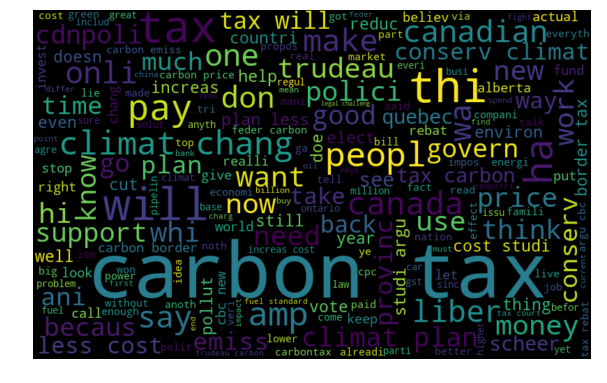

In [13]:
# # # DATA VISIUALIZATION # # #

''' 
This is integral to the jod of a data scientist as this is where insights are found.
We must ask ourselves some questions:
    what are most common words in entire dataset?
    most common words for negative and positive tweets respectively?
    how many hashtags are there in a tweet?
    which trends are associated with my dataset?
    which trends are associated with either of my sentiments? are they compatible with the sentiments?
'''

#A) UNDERSTANDING COMMON WORDS USED IN THE TWEETS: 'WORDCLOUD'

'''
Let's see how the sentiment of the tweets are distributed across the dataset, one way to do this is through a wordcloud.
A wordcloud is a visualization where the most common words appear large and less common words appear small.
'''

all_words = ' '.join([text for text in data['clean_tweet']])
wordcloud = wc.WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

'''
now that the wordlcoud has been generated, we need a way to visualize it physically, so we use matplot
'''

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

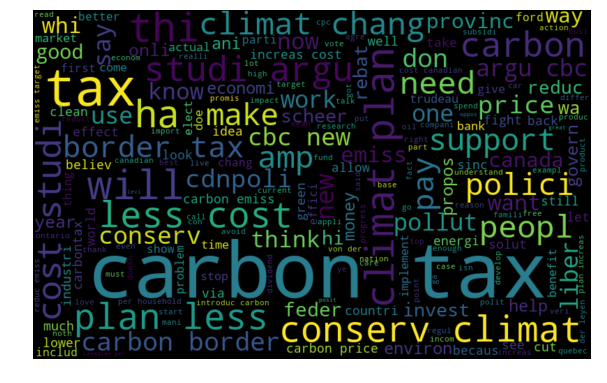

In [14]:
#WORDCLOUD FOR PRO CARBON TAX TWEETS

'''
we want to be able to view the wordcloud for tweets containg words that are Pro and Against Carbon Tax so now we will create
two different word clouds to represent both
'''

normal_words = ' '.join([text for text in data['clean_tweet'][data['Polarity'] == 1]])

wordcloud = wc.WordCloud(width=800, height=500, random_state=21,max_font_size=110).generate(normal_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


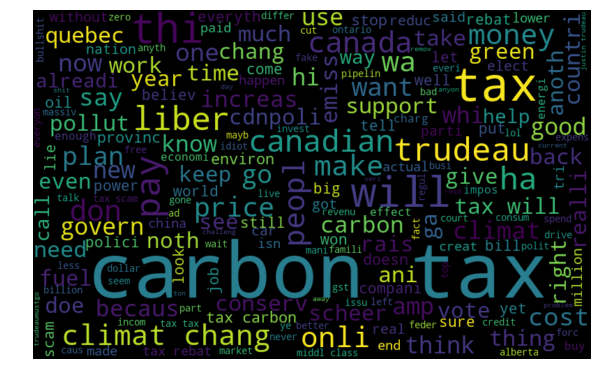

'\nif we look at the wordclouds we can see that a lot of words are \ncommon across tweets that are classified as negative and postitive. \n'

In [15]:
#WORDCLOUD FOR NEGATIVE CARBON TAX TWEETS

negative_words = ' '.join([test for test in data['clean_tweet'][data['Polarity'] == -1]])

wordcloud = wc.WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

'''
if we look at the wordclouds we can see that a lot of words are 
common across tweets that are classified as negative and postitive. 
'''

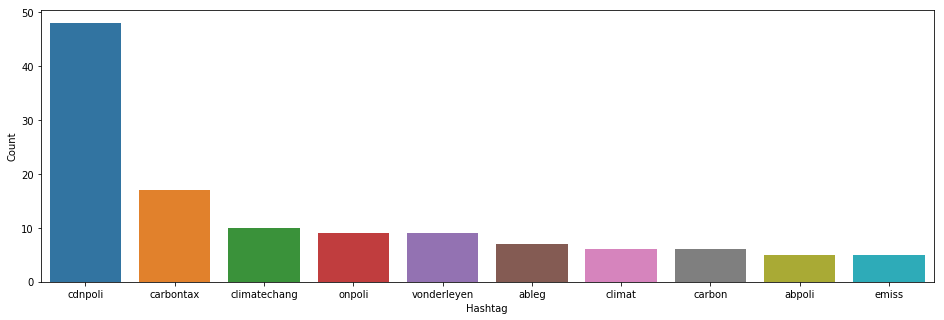

In [16]:
#D) UNDERSTANDING THE IMPACT OF HASHTAGS ON TWEET SENTIEMENT
'''
we left hastags in the tweets because they indicate trends and are used to express sentiment, 
for instance a tweet with the '#Trudeaumustgo' may indicate negative sentiment.
'''

#function to collect hashtags

def hashtag_extract(x):
    hashtags = []
    
    #loop over words in the tweet
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

#extracting hashtags from positive carbon tax tweets

HT_regular = hashtag_extract(data['clean_tweet'][data['Polarity']==1])

#extracting hashtages from negative carbon tax tweets

HT_negative = hashtag_extract(data['clean_tweet'][data['Polarity'] ==-1])

#unnesting list

HT_regular = sum(HT_regular, [])
HT_negative = sum(HT_negative, [])

'''
now that the hashtag list has been created we can plot the top hashtags
'''

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())})

#Select top 10 frquent positive cabon tax tweet hashtags

d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=d, x= "Hashtag", y= "Count")
ax.set(ylabel = "Count")
plt.show()


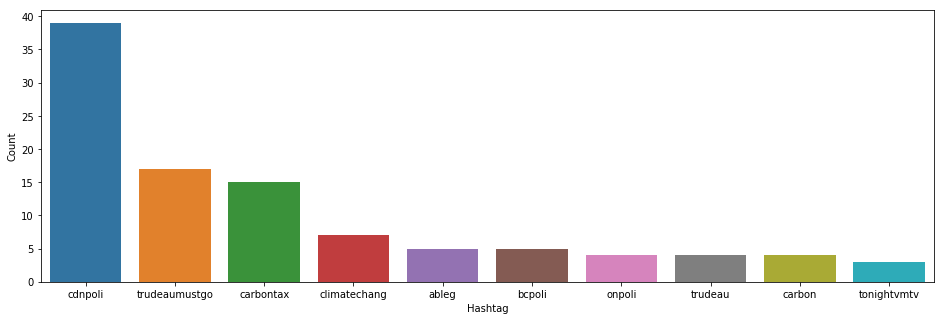

In [17]:
#most frequent hashtags in negative list

b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

#selecting the top 10 most frequent hashtags negative

e = e.nlargest(columns='Count', n = 10)
plt.figure(figsize=(16, 5))
ax = sns.barplot(data=e, x= "Hashtag", y="Count")
ax.set(ylabel= 'Count')
plt.show()


# Model Building - Random Forest Classifier

Here we create the IV and DV, split the dataset into training and test (70:30 split), vectorize, and create the Random Forest model. 

In [22]:
dependent_vars = data['Tweet']
independent_vars = data["Polarity"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dependent_vars, independent_vars, test_size=0.3, random_state=0)

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words=stopwords.words('english'))
training_data_transformed = vectorizer.fit_transform(X_train)
testing_data_transformed = vectorizer.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(training_data_transformed, y_train)





RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

# Model Results

In [23]:
predictions = text_classifier.predict(testing_data_transformed)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, predictions))
print("CLASSIFICATION REPORT:")
print(classification_report(y_test, predictions))
print("ACCURACY SCORE:")
print(accuracy_score(y_test, predictions))

CONFUSION MATRIX:
[[279  44  14]
 [ 91 102   8]
 [ 94  30  53]]
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

          -1       0.60      0.83      0.70       337
           0       0.58      0.51      0.54       201
           1       0.71      0.30      0.42       177

   micro avg       0.61      0.61      0.61       715
   macro avg       0.63      0.54      0.55       715
weighted avg       0.62      0.61      0.58       715

ACCURACY SCORE:
0.606993006993007


 From the results we see the model performs above avergae with an accuracy of 60%. 
